# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys 
sys.path.append('..')
import os
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [6]:
#save config
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 


name = []
number = []
lat = []
lon = []
maxt = []
hum = []
clds = []
ws = []
country = []
date = []

#loop through city and request data on each one
index = 0
group = 1
for city in cities[:550]:
    #rate limit on api calls
    index +=1
    if index ==51:
        index = 0
        group += 1
        time.sleep(60)
    #http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID==Atlanta
    #base_url -------------------------------------------------------------------------------------------
    city_url = f"{base_url}&q={city.replace(' ', '+')}"
    response = requests.get(city_url).json()
#append results to list placeholders
    try:
        number.append(response['id'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxt.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        clds.append(response['clouds']['all'])
        ws.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        name.append(response['name'])
        print(f"Processing Record {index} of set {group} for {city}, with city number {response['id']}")

    #alert when city is not found
    except KeyError:
        print("City not found.  Moving on...")
        pass

print('Data Processing Complete')

Processing Record 1 of set 1 for barrow, with city number 5880054
Processing Record 2 of set 1 for chicama, with city number 3698359
Processing Record 3 of set 1 for maragogi, with city number 3395458
Processing Record 4 of set 1 for kloulklubed, with city number 7671223
Processing Record 5 of set 1 for plettenberg bay, with city number 964712
Processing Record 6 of set 1 for rikitea, with city number 4030556
Processing Record 7 of set 1 for ushuaia, with city number 3833367
Processing Record 8 of set 1 for khash, with city number 1160571
Processing Record 9 of set 1 for hobart, with city number 2163355
Processing Record 10 of set 1 for sao paulo de olivenca, with city number 3662252
Processing Record 11 of set 1 for tuktoyaktuk, with city number 6170031
Processing Record 12 of set 1 for kaitangata, with city number 2208248
Processing Record 13 of set 1 for pacific grove, with city number 5380437
Processing Record 14 of set 1 for tsurib, with city number 480798
Processing Record 15 of 

Processing Record 26 of set 3 for olafsvik, with city number 3414079
Processing Record 27 of set 3 for trofors, with city number 3133983
Processing Record 28 of set 3 for husavik, with city number 2629833
Processing Record 29 of set 3 for hasaki, with city number 2112802
City not found.  Moving on...
Processing Record 31 of set 3 for tyup, with city number 1527121
Processing Record 32 of set 3 for hermanus, with city number 3366880
City not found.  Moving on...
Processing Record 34 of set 3 for plastun, with city number 2017912
Processing Record 35 of set 3 for port lincoln, with city number 2063036
Processing Record 36 of set 3 for challapata, with city number 3921355
Processing Record 37 of set 3 for severo-kurilsk, with city number 2121385
Processing Record 38 of set 3 for faya, with city number 110690
Processing Record 39 of set 3 for ulcinj, with city number 3188516
Processing Record 40 of set 3 for luanda, with city number 2240449
Processing Record 41 of set 3 for khonsa, with ci

Processing Record 0 of set 6 for pitimbu, with city number 3391889
Processing Record 1 of set 6 for kahului, with city number 5847411
Processing Record 2 of set 6 for cortez, with city number 5418104
Processing Record 3 of set 6 for georgetown, with city number 1735106
City not found.  Moving on...
Processing Record 5 of set 6 for upernavik, with city number 3418910
Processing Record 6 of set 6 for olinda, with city number 3393536
Processing Record 7 of set 6 for moyale, with city number 186180
Processing Record 8 of set 6 for victor harbor, with city number 2059470
Processing Record 9 of set 6 for jiayuguan, with city number 1280957
Processing Record 10 of set 6 for trat, with city number 1605277
Processing Record 11 of set 6 for douglas, with city number 5067114
Processing Record 12 of set 6 for sovetskoye, with city number 1491219
Processing Record 13 of set 6 for stratford, with city number 4843811
Processing Record 14 of set 6 for orange, with city number 5379524
City not found.  

Processing Record 22 of set 8 for ashington, with city number 2656947
Processing Record 23 of set 8 for hit, with city number 95788
Processing Record 24 of set 8 for lugo, with city number 3117813
Processing Record 25 of set 8 for esperance, with city number 2071860
Processing Record 26 of set 8 for comodoro rivadavia, with city number 3860443
City not found.  Moving on...
Processing Record 28 of set 8 for kabinda, with city number 215527
Processing Record 29 of set 8 for cravo norte, with city number 3685702
City not found.  Moving on...
Processing Record 31 of set 8 for kontagora, with city number 2334008
Processing Record 32 of set 8 for calama, with city number 3897347
Processing Record 33 of set 8 for bar harbor, with city number 4957320
Processing Record 34 of set 8 for ancud, with city number 3899695
Processing Record 35 of set 8 for fayaoue, with city number 2141305
Processing Record 36 of set 8 for izhma, with city number 554830
Processing Record 37 of set 8 for santa cruz del

Processing Record 43 of set 10 for harper, with city number 2276492
Processing Record 44 of set 10 for north bend, with city number 5742974
Processing Record 45 of set 10 for linguere, with city number 2249281
Processing Record 46 of set 10 for guarapari, with city number 3461888
Processing Record 47 of set 10 for whitianga, with city number 2179103
Processing Record 48 of set 10 for sao gabriel da cachoeira, with city number 3662342
Processing Record 49 of set 10 for coquimbo, with city number 3893629
Processing Record 50 of set 10 for bambanglipuro, with city number 1650434
Processing Record 0 of set 11 for belmonte, with city number 3470137
Processing Record 1 of set 11 for hofn, with city number 2630299
Processing Record 2 of set 11 for alabaster, with city number 4829762
Processing Record 3 of set 11 for urucara, with city number 3385670
Processing Record 4 of set 11 for hwange, with city number 889942
Processing Record 5 of set 11 for aneho, with city number 2367990
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
#create dataframe out of above results

weather_dictionary = {
    "City": name,
    "Lat": lat,
    "Lon": lon,
    "Max Temp": maxt,
    "Humidity": hum,
    "Cloudiness": clds,
    "Wind Speed": ws,
    "Country": country,
    "Date": date
}

weat_data = pd.DataFrame(weather_dictionary)
weat_data

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,-5.78,77,0,20.71,US,1650041389
1,Chicama,-7.8447,-79.1469,63.14,61,25,10.54,PE,1650041389
2,Maragogi,-9.0122,-35.2225,85.37,63,60,10.11,BR,1650041390
3,Kloulklubed,7.0419,134.2556,77.50,79,100,7.49,PW,1650041390
4,Plettenberg Bay,-34.0527,23.3716,58.71,63,99,3.80,ZA,1650041390
...,...,...,...,...,...,...,...,...,...
501,Myitkyina,25.3833,97.4000,72.39,73,32,2.06,MM,1650042148
502,Mehrān,33.1222,46.1646,73.72,8,0,12.95,IR,1650042148
503,Barrancas,10.9576,-72.7877,93.33,46,87,5.82,CO,1650042148
504,Ossora,59.2353,163.0719,16.95,86,100,5.59,RU,1650042149


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

humid_check = weat_data.describe()

if humid_check.iloc[7, 3] > 100:
    clean_data = weat_data.drop(weat_data[weat_data['Humidity'] > 100].index, inplace=False)
else:
    clean_data = weat_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

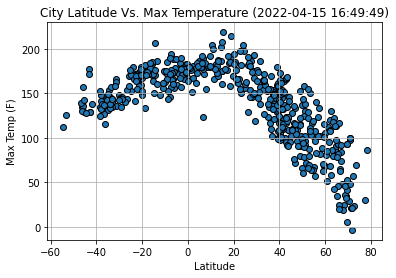

In [9]:
x_axis = clean_data['Lat']
y_axis = clean_data['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit='s')

plt.scatter(x_axis, y_axis, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f'City Latitude Vs. Max Temperature ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

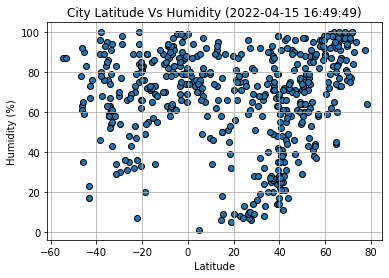

In [11]:
x_axis = clean_data['Lat']
y_axis = clean_data['Humidity']
date = pd.to_datetime(clean_data['Date'], unit='s')

plt.scatter(x_axis, y_axis, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude Vs Humidity ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

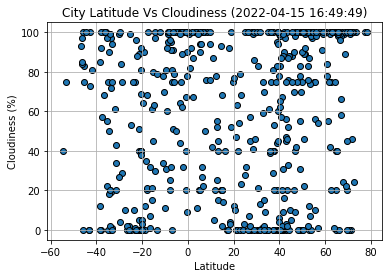

In [12]:
x_axis = clean_data['Lat']
y_axis = clean_data['Cloudiness']
date = pd.to_datetime(clean_data['Date'], unit='s')

plt.scatter(x_axis, y_axis, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude Vs Cloudiness ({date[0]})')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

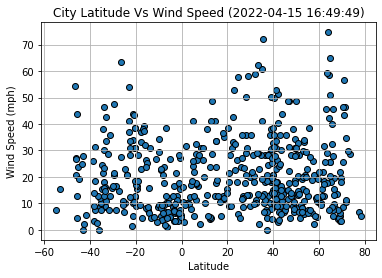

In [16]:
x_axis = clean_data['Lat']
y_axis = clean_data['Wind Speed'] * 2.23694
date = pd.to_datetime(clean_data['Date'], unit='s')

plt.scatter(x_axis, y_axis, edgecolors= 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude Vs Wind Speed ({date[0]})')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0       66.164927
3      194.779655
7      152.382579
10      69.841281
12     135.574045
          ...    
501    158.063361
502    142.571429
503    186.941105
504     90.297542
505    122.260100
Name: Lat, Length: 334, dtype: float64
y = x +208.88
The r-value is : 0.7074081148281585


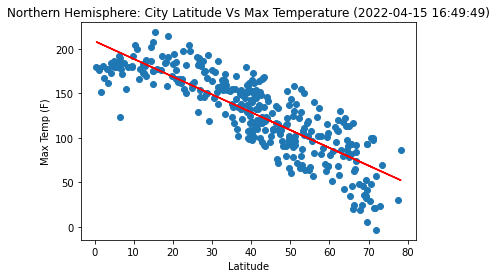

In [18]:
northern_hemisphere = clean_data.drop(clean_data[clean_data['Lat'] < 0].index, inplace=False)

x_axis = northern_hemisphere['Lat']
y_axis = northern_hemisphere['Max Temp']
y_axis = (y_axis * (9/5)) + 32
date = pd.to_datetime(clean_data['Date'], unit = 's')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

regress_values = x_axis * slope + intercept
print(regress_values)

line_eq = "y = " + "x +" + str(round(intercept,2))
print(line_eq)

print(f"The r-value is : {rvalue**2}")

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title(f"Northern Hemisphere: City Latitude Vs Max Temperature ({date[0]})")
plt.annotate(line_eq,(-4,20), fontsize=15, color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression